

# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


In this Notebook I'll be analyzing data regarding 10,000 movies. This data has been collected from The Movie Database.

The columns names of the dataset and their significance are the following:

id   : general id of the movie                  
imdb_id  : id assigned at imdb               
popularity : different from rating, it depends on votes and views of the day, release date, previous days score. It fluctuates frequently             
budget   : for producing the movie               
revenue: revenue of the movie                 
original_title: title of the movie          
cast :  main roles                  
homepage                
director                
tagline                 
keywords: several keywords related to the movie                
overview: sum-up of the movie's plot               
runtime : duration in minutes                 
genres                  
production_companies    
release_date: year, month and day of release            
vote_count: total vote count in TMDb            
vote_average: the mean of the votes received by the movie            
release_year: year of release          
budget_adj: updated budget in terms of 2010 dollars, accounting for inflation    
revenue_adj: updated in terms of 2010 dollars, accounting for inflation

### Question(s) for Analysis

I'm interested in finding out if there is any correlation between the variable 'vote_average' and other variables:

- Is there a correlation between good-ratings and other variables?
- Are some companies better than others producing well rated movies?
- Does the size of the budget matter to get good ratings?
- Are sequels' ratings high?



In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [37]:
# Loading data and printing first few lines

df=pd.read_csv('tmdb-movies.csv')

df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [38]:
## checking the data type of each column, number of rows, columns, and missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [39]:
## Shape of the dataset
df.shape

(10866, 21)

In [40]:
#Descriptive statistics of the dataset's numerical values

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412



### Data Cleaning


Some of the columns are not relevant to answer to the questions of the investigation. Also, the release year is already part of the 'release_date' column.
As for columns 'budget' and 'revenue', I rather keep the updated values 'budget_adj' and 'revenue_adj' to compare figures more accurately taking inflation into account.

I will be dropping all the columns I mentioned to simplify the dataset:
 

In [41]:
## Dropping columns not relevant to the investigation

df.drop(['id', 'imdb_id','homepage','tagline','cast','overview', 'popularity','release_year', 'budget', 'revenue'], axis=1, inplace=True)

Certain columns contain values separated by pipe characters. I'm going to replace them by commas:

In [42]:
## Replacing pipe characters by commas using .replace method. I found 
## information about the best way to do it in a blog post of stackoverflow.

df=df.replace('\|', ', ', regex=True)

## Making sure it worked by having a glance to the first few lines of the dataset
df.head()

,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...",124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15,5562,6.500,137999939.280,1392445892.524
1,Mad Max: Fury Road,George Miller,"future, chase, post-apocalyptic, dystopia, aus...",120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15,6185,7.100,137999939.280,348161292.489
2,Insurgent,Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...",119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15,2480,6.300,101199955.472,271619025.408
3,Star Wars: The Force Awakens,J.J. Abrams,"android, spaceship, jedi, space opera, 3d",136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15,5292,7.500,183999919.040,1902723129.802
4,Furious 7,James Wan,"car race, speed, revenge, suspense, car",137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15,2947,7.300,174799923.088,1385748801.471


As it's not easy to interpret dollar figures in scientific notation, I'm going to convert the concerned columns into float formatting:

In [43]:
## Converting scientific notation into float formatting for readibility
## I found information on the best way of formatting the scientific notation 
## on a post of stackoverflow.com

pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.head()

,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...",124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",6/9/15,5562,6.500,137999939.280,1392445892.524
1,Mad Max: Fury Road,George Miller,"future, chase, post-apocalyptic, dystopia, aus...",120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",5/13/15,6185,7.100,137999939.280,348161292.489
2,Insurgent,Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...",119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",3/18/15,2480,6.300,101199955.472,271619025.408
3,Star Wars: The Force Awakens,J.J. Abrams,"android, spaceship, jedi, space opera, 3d",136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",12/15/15,5292,7.500,183999919.040,1902723129.802
4,Furious 7,James Wan,"car race, speed, revenge, suspense, car",137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",4/1/15,2947,7.300,174799923.088,1385748801.471


I'm going to check out the dataset's composition, data types and null values after the modifications I've just made:

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
original_title          10866 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 933.9+ KB


Let's get some insight into the distribution of the values of the numerical values:

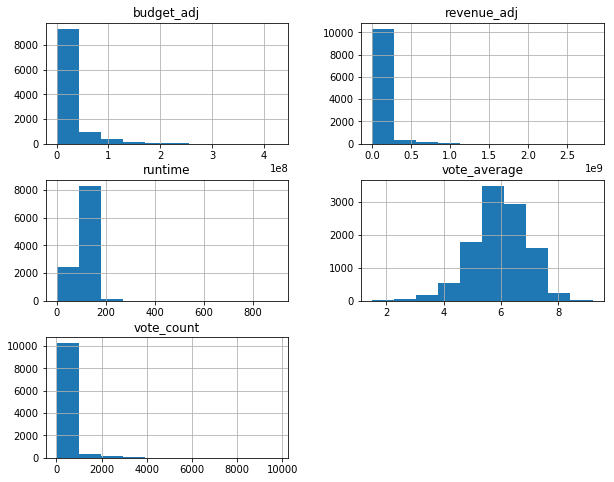

In [45]:
# Histogram of all numerical columns
df.hist(figsize=(10,8));

As we can see in the histograms above, most of them are skewed to the right.

There are over 1000 null values in the column 'production_companies'. Before dropping so many lines I'd like to make sure I'm not dismissing important information by doing so. Therefore, I investigate the composition and the distribution of the rows with a 'production_company' null value:

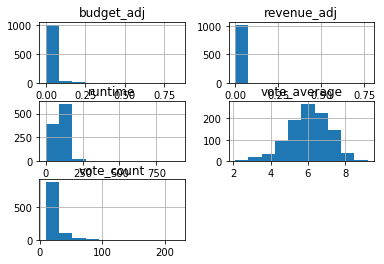

In [46]:
df[df.production_companies.isnull()].hist();

As we can see, for most of the other columns, the values' distribution is similar to the distribution of the whole dataset. The main difference is in the vote count(most movies with null value for 'production_companies' got very few votes - below 50). 
Therefore I think we can drop rows with null value in 'production_companies' without losing relevant data together with the rest of null values.

In [47]:
## Dropping all null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8692 entries, 0 to 10865
Data columns (total 11 columns):
original_title          8692 non-null object
director                8692 non-null object
keywords                8692 non-null object
runtime                 8692 non-null int64
genres                  8692 non-null object
production_companies    8692 non-null object
release_date            8692 non-null object
vote_count              8692 non-null int64
vote_average            8692 non-null float64
budget_adj              8692 non-null float64
revenue_adj             8692 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 814.9+ KB


There are many values equal to zero in columns revenue_adj and budget_adj:

In [14]:
## Creating a function to check how many null values are in a column and 
##applying it to the column 'revenue_adj'

def null_shape(column):
    return (df[column==0].shape[0])
    

null_shape(df['revenue_adj'])

4153

In [15]:
## I apply the function to column 'budget_adj'
null_shape(df['budget_adj'])

3958

I'm going to delete all the rows where either 'revenue_adj' or 'budget_adj' are equal to zero:

In [48]:
df=df[df.revenue_adj!=0]
df=df[df.budget_adj!=0]

I veryfy that there are no zero values in either column:

In [17]:
null_shape(df['revenue_adj'])

0

In [18]:
null_shape(df['budget_adj'])

0

I'm going to check if there is any duplicated values in the dataset. In the affirmative, I will drop the duplicated row and check again that there are no duplicates left:

In [19]:
## sum of all duplicate values in the dataset
sum(df.duplicated())

1

In [20]:
##dropping the duplicate value and checking out it worked 
df=df.drop_duplicates()
sum(df.duplicated())

0

I'm going to change the date format of column "release_date" to datetime:

In [21]:
##Changing date type of 'release_date' to date format and checking the result 
##by printing first few rows of the df
df['release_date']=pd.to_datetime(df['release_date'])
df.head()

,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,"monster, dna, tyrannosaurus rex, velociraptor,...",124,"Action, Adventure, Science Fiction, Thriller","Universal Studios, Amblin Entertainment, Legen...",2015-06-09,5562,6.500,137999939.280,1392445892.524
1,Mad Max: Fury Road,George Miller,"future, chase, post-apocalyptic, dystopia, aus...",120,"Action, Adventure, Science Fiction, Thriller","Village Roadshow Pictures, Kennedy Miller Prod...",2015-05-13,6185,7.100,137999939.280,348161292.489
2,Insurgent,Robert Schwentke,"based on novel, revolution, dystopia, sequel, ...",119,"Adventure, Science Fiction, Thriller","Summit Entertainment, Mandeville Films, Red Wa...",2015-03-18,2480,6.300,101199955.472,271619025.408
3,Star Wars: The Force Awakens,J.J. Abrams,"android, spaceship, jedi, space opera, 3d",136,"Action, Adventure, Science Fiction, Fantasy","Lucasfilm, Truenorth Productions, Bad Robot",2015-12-15,5292,7.500,183999919.040,1902723129.802
4,Furious 7,James Wan,"car race, speed, revenge, suspense, car",137,"Action, Crime, Thriller","Universal Pictures, Original Film, Media Right...",2015-04-01,2947,7.300,174799923.088,1385748801.471


As we can see below there are many less rows than what we started with. Nevertheless it's a more homogenous and consistent dataset than the original one, without any duplicates, missing values or zeros.

In [22]:
## Composition of the dataset and datatypes of the resulting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 0 to 10848
Data columns (total 11 columns):
original_title          3679 non-null object
director                3679 non-null object
keywords                3679 non-null object
runtime                 3679 non-null int64
genres                  3679 non-null object
production_companies    3679 non-null object
release_date            3679 non-null datetime64[ns]
vote_count              3679 non-null int64
vote_average            3679 non-null float64
budget_adj              3679 non-null float64
revenue_adj             3679 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 344.9+ KB


In [23]:
## Looking up the descriptive statistics of the df
df.describe()

,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3679.000,3679.000,3679.000,3679.000,3679.000
mean,109.561,547.413,6.182,45364250.989,142011525.137
std,19.855,894.797,0.790,45191098.534,219481097.448
min,26.000,10.000,2.200,0.969,2.862
25%,96.000,78.000,5.700,13816365.762,20375176.800
50%,106.000,218.000,6.200,31020737.363,65464324.000
75%,120.000,595.000,6.700,62130112.856,170436409.521
max,338.000,9767.000,8.400,425000000.000,2827123750.412


Minimum value of 'budget_adj' column is very low. I'm sorting the column values to check if there are more values that seem to low for the production of a film.

In [24]:
## Sorting values in column 'budget_adj'
sort_by_budget= df.sort_values('budget_adj')
sort_by_budget.head(30)

,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
3581,"Love, Wedding, Marriage",Dermot Mulroney,"wedding vows, marriage, love",90,"Comedy, Romance","120dB Films, Scion Films, Voodoo Production Se...",2011-06-03,55,5.300,0.969,1335.831
2618,Lost & Found,Jeff Pollack,"restaurant, neighbor, dog, ring",95,"Comedy, Romance","Alcon Entertainment, Dinamo Entertainment",1999-04-23,14,4.800,1.309,130.905
2398,Boy,Taika Waititi,"new zealand, maori, farm, goat, duringcreditss...",87,"Drama, Comedy","New Zealand Film Commission, Unison Films, Whe...",2010-02-14,26,7.300,3.000,43.000
8944,Death Wish 2,Michael Winner,"rape, detective, drug traffic, vigilante, revenge",88,"Action, Crime, Thriller",Cannon Films,1982-02-20,27,5.600,4.519,36.154
10050,Tales from the Darkside: The Movie,John Harrison,"anthology, based on tv series, darkside, antho...",93,"Fantasy, Horror, Comedy","Paramount Pictures, Laurel Productions, Darksi...",1990-05-03,37,5.800,5.007,26.702
8235,Tales from the Hood,Rusty Cundieff,"prison, ghetto, anthology, evil doll, murder",98,"Horror, Thriller",Savoy Pictures,1995-05-24,13,5.100,8.586,15.741
5852,Hross Ã­ oss,Benedikt Erlingsson,"horse, snow storm, icelandic",85,"Drama, Romance, Comedy","Filmhuset Gruppen, Leiknar Myndir",2013-08-30,11,6.500,9.360,10.296
8125,The Prophecy,Gregory Widen,"angel, archangel gabriel, menschheit",98,"Fantasy, Horror, Thriller",Dimension Films,1995-09-01,54,5.500,11.448,22.895
10297,National Lampoon's Loaded Weapon 1,Gene Quintano,"cocaine, police, spoof, los angeles",84,Comedy,New Line Cinema,1993-02-04,72,5.500,12.076,40.756
10236,Teenage Mutant Ninja Turtles III,Stuart Gillard,"japan, time travel, ninjas",96,"Action, Adventure, Comedy, Family, Fantasy","New Line Cinema, Golden Harvest Pictures, Clea...",1993-03-17,95,5.200,31.699,63.398


The first 30 values in column 'budget_adj' seem too low for the production of a movie. Nevertheless, and as I don't know the exact amount that is considered as reasonable for a movie's budget, I'll just keep in mind this limitation of the dataset when interpreting the results.

<a id='eda'></a>
## Exploratory Data Analysis



### Are there companies more successful than others producing well rated movies?

There seem to be many production companies. Nevertheless, I'd like to see if there are a few companies that produce the best rated movies.

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['production_companies'].nunique()

2905

I'll define the best rated movies as those that get the ratings between the 75th and 100th percentile, i.e. a rating over 6.7 points. First I'll select only movies that fit in that category and then I'll check the distribution of the production companies within that group.

In [26]:
## Filtering the top 25% rated movies
df_p=df.query('vote_average>6.7')
df_p.shape

(878, 11)

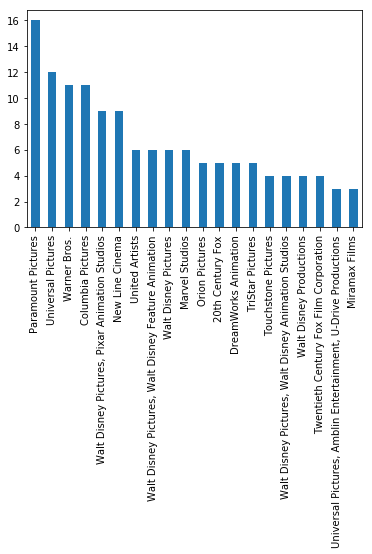

In [27]:
df_p['production_companies'].value_counts().head(20).plot(kind='bar');

As per our dataset, it seems Paramount Pictures, Universal Pictures, Coumbia Pictures and Warner Bros have produced some of the best rated (top 25%) movies. Nevertheless, this might be either because their experience in the industry or because they produce many more movies than other Production companies.

We can see also that Walt Disney is not in the top three but it has coproduced some of the films and produces them under different names: Walt Disney Pictures, Walt Disney Productions, Walt Disney Feature Animation.

As we can see below, the Production Companies producing more well rated movies by TMDb users are also producing many more movies than other Production Companies (in average each company - or compound of companies- produced 1.27 movies) : 

In [28]:
## Count of produced movies per production company, all ratings included. Only first 20,
##descending order
df['production_companies'].value_counts().head(20)

Paramount Pictures                                     75
Universal Pictures                                     57
Columbia Pictures                                      39
New Line Cinema                                        37
Warner Bros.                                           32
Metro-Goldwyn-Mayer (MGM)                              25
Touchstone Pictures                                    23
Twentieth Century Fox Film Corporation                 21
Walt Disney Pictures                                   21
20th Century Fox                                       20
Orion Pictures                                         17
Miramax Films                                          17
Dimension Films                                        16
DreamWorks Animation                                   15
United Artists                                         15
TriStar Pictures                                       15
Columbia Pictures Corporation                          15
Walt Disney Pi

In the pie chart below we can see the ten production companies that produced more movies each. These are all big names of the cinema industry.

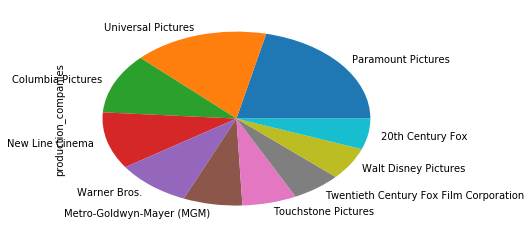

In [29]:
#Number of movies, all ratings included, produced by first 10 production
##companies with more movies in the dataset
df['production_companies'].value_counts().head(10).plot(kind='pie');

### Are the most expensive movies also the most popular/best rated movies?

Now I would like to see if there is any correlation between the rating of a movie ('vote_average') and the budget used for producing it:

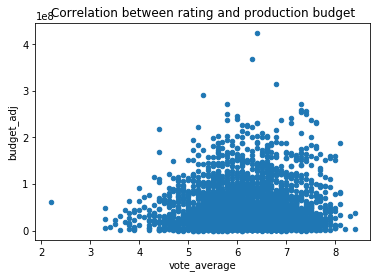

In [30]:
## Plotting ratings against budget
df.plot(x='vote_average', y='budget_adj', kind='scatter', title= 'Correlation between rating and production budget');

There is some positive correlation, but not very strong. There are a lot of movies with a small budget that got a good 'vote_average' in TMDb.

### Is the rating of sequels better than the average rating? What's the distribution of the popularity of movies considered as sequels ?

I personally find most sequels worse than the original title so I would like to see how many of the movies considered as sequels are rated better than the mean value of 'vote_average' (6.182) and how many worse:

Now I will try to find out how many out of the 53 movies classed as sequels get a better 'vote_average' than the mean of the whole dataset (6.182):


In [31]:
sequels= df[df['keywords'].str.contains('sequel', case=False)]
sequels.shape

(53, 11)

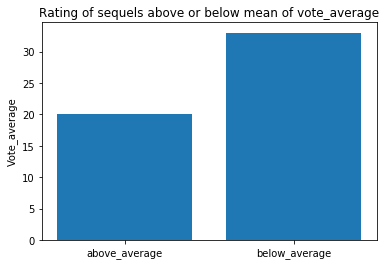

In [32]:
mean_rating= df['vote_average'].mean()


above_average=sequels[sequels['vote_average']>mean_rating].count()['original_title']
below_average=sequels[sequels['vote_average']<mean_rating].count()['original_title']
plt.bar(["above_average","below_average"], [above_average,below_average]);
plt.title('Rating of sequels above or below mean of vote_average');
plt.ylabel('Vote_average');


### Is there a correlation between budget and profit? 

We've seen that there is no a strong correlation between 'budget' and 'vote_average'. Nevertheless, I'd like to see whether films that were more expensive to produce were also more profitable. To see this correlation, I'm going to create a new column named 'profit':

In [33]:
## Creating a new column called 'profit'
df['profit']= df['revenue_adj']-df['budget_adj']
df.describe()

,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,3679.000,3679.000,3679.000,3679.000,3679.000,3679.000
mean,109.561,547.413,6.182,45364250.989,142011525.137,96647274.147
std,19.855,894.797,0.790,45191098.534,219481097.448,197499742.828
min,26.000,10.000,2.200,0.969,2.862,-413912431.000
25%,96.000,78.000,5.700,13816365.762,20375176.800,-916799.688
50%,106.000,218.000,6.200,31020737.363,65464324.000,30184497.892
75%,120.000,595.000,6.700,62130112.856,170436409.521,113026524.836
max,338.000,9767.000,8.400,425000000.000,2827123750.412,2750136650.919


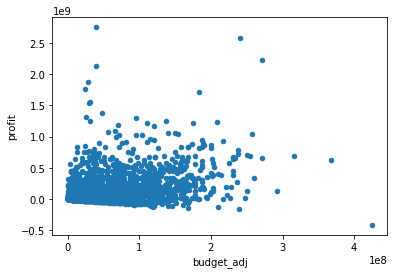

In [34]:
## plotting on budget and profit to see whether there is a correlation or not.

df.plot(x='budget_adj', y='profit', kind='scatter');

There is a positive correlation which means that as the budget increases the profit sometimes does too. Nevertheless, as per the scatter plot we can see it's not very strong.

### Is there a correlation between profit and good ratings in TMDb?

What about the correlation between 'profit' and 'vote_average'? Let's see if profitable films got a higher 'vote_average' than those that got a smaller profit.

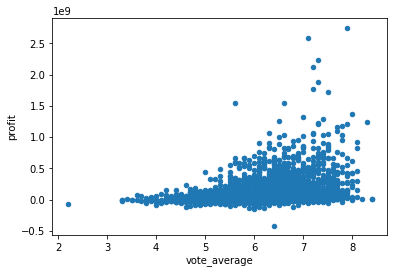

In [35]:
df.plot(x='vote_average', y='profit', kind='scatter');

The correlation is clearly positive between both variables. It means that profitable films got overall better ratings than films that were less profitable.



<a id='conclusions'></a>
## Conclusions



I focused in the ratings of the films of the dataset and their relationship with other variables. 

First, I tried to check if some production companies were better at producing well rated movies. There seem to be some companies that got many more well rated movies than the average of the other production companies. Nevertheless, the analysis has some limitations. Same companies that have produced more well rated movies have also produced many more films, regardless the rating, than the rest of the production companies. This limitation could be overcome by working with proportions. The second limitation is that many companies produce movies together with other production companies. Therefore the number of movies each company has produced is more dificult to determine. 

Second, I wanted to find out if there was some correlation between the most expensive movies and good ratings, i.e.: whether most expensive movies were getting also the highest ratings. Looking to the scatter plot of the two variables, there seems to be some positive correlation but it isn't very strong. There are slightly more films with a big budget that got also better ratings. Nevertheless, there are many films with a budget on the small side that got rated really well. 

Third, I was curious about the rating ('vote_average') of movies classed as sequels. I wanted to know it their rating was over or below the mean of 'vote_average'. I found 53 sequel movies as per the variable 'keyword'. The majority of them (33 out of 53) got a rating below the mean of 'vote_average'. As per this dataset, sequel movies tend to be worse rated overall than movies that aren't a sequel.

Fourth, I calculated the profit of each movie by substracting 'budget_adj' from 'revenue_adj'. I wanted to see whether movies with an important budget are more profitable than those with a small budget. There is no clear correlation between both variables according to the scatter plot I produced: small budget films are profitable more or less as often as big budget films of this dataset. It would be interesting to find out whether there are additional revenues and profit (not only those related to selling cinema tickets) that expensive movies have access to and other movies don't.

Finally, I tried to see if there is any correlation between profitable films and good ratings. As per the scatter plot on variables 'profit' and 'vote_average' it seems to be a positive correlation, i.e. films that are more profitable seem to be also better rated than the average.

An important limitation of the dataset is the number of missing values. There are more than 1000 missing values in the column 'production_companies'. It should be possible to look up the movies concerned by the missing values and find out the name of the production company. Nevertheless, due to the limited time to produce the report I abandoned the idea. I dropped all the null values instead. As a result the dataset was much smaller than the original one.

Another limitation is the one noticed in the column 'budget_adj'. Even after dropping all values equal to zero, there are some very low values in the column. Double checking budget_adj values or dropping rows that don't meet a minimum value could be solutions to improve the quality of the dataset.


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255